In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from fullfrlm import flow_refueling_location_model
from generate_network_nodes import generate_network
from ema_workbench import IntegerParameter, RealParameter, Model, ScalarOutcome, CategoricalParameter, Constant, ArrayOutcome
import time

In [2]:
#define model
model = Model("frlm", function=flow_refueling_location_model)

In [3]:
#define parameters
model.constants = [
    Constant("random_data", False),
    Constant("additional_nodes", 3),
    # Constant('n', 25),
    # Constant('r', 70000),
    Constant('scenario_var', 0),
    Constant('p', 40)
    # Constant('scenario_var', 0),
]

model.uncertainties = [
    # 70000
    # CategoricalParameter("r", [70000, 110000, 150000]),
    # CategoricalParameter("additional_nodes", [0, 1, 2, 3]),
    # CategoricalParameter("r", [70000]),
    # CategoricalParameter("scenario_var", [0, 1, 2]),
    CategoricalParameter("r", [50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000, 130000, 140000, 150000]),
#     CategoricalParameter("seed", [259572, 7542, 864199, 11540, 188813, 411862, 546078, 420812, 304196, 814030])
]

# set levers
model.levers = [
    # CategoricalParameter('p', list(np.arange(1, 101, 10))),
    # CategoricalParameter("additional_nodes", [0, 1, 2, 3]),
    CategoricalParameter('n', [10, 15, 20, 25, 30])
]

# specify outcomes
model.outcomes = [
    ScalarOutcome("total_flow"),
    ScalarOutcome("fraction_captured_total"),
    ScalarOutcome("serviceable_fraction"),
    ScalarOutcome("served_fraction"),
    ArrayOutcome("optimal_facilities"),
    ArrayOutcome('non_zero_flows'),
    ScalarOutcome('add_nodes_used'),
]

In [4]:
from ema_workbench import MultiprocessingEvaluator, SequentialEvaluator, ema_logging, perform_experiments, Samplers

ema_logging.log_to_stderr(ema_logging.INFO)

with MultiprocessingEvaluator(model, n_processes=20) as evaluator:
    experiments, outcomes = evaluator.perform_experiments(scenarios=11, policies=4, uncertainty_sampling=Samplers.FF, lever_sampling=Samplers.FF)

[MainProcess/INFO] pool started with 20 workers
[MainProcess/INFO] performing 11 scenarios * 5 policies * 1 model(s) = 55 experiments
100%|██████████████████████████████████████████| 55/55 [09:11<00:00, 10.02s/it]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [9]:
pickle.dump( outcomes, open("results/outcomes_all_withvar_new_max4.p", "wb") )
pickle.dump( experiments, open( "results/experiments_all_withvar_new_max4.p", "wb" ) )

In [5]:
# pickle.dump( experiments, open( "results/experiments_all_without_new_max4.p", "wb" ) )
# pickle.dump( outcomes, open("results/outcomes_all_without_new_max4.p", "wb") )
# experiments = pickle.load(open("results/experiments_batch_run606new.p", "rb"))
# outcomes = pickle.load(open("results/outcomes_batch_run606new.p", "rb"))

# Why n=25?

In [19]:
outcomes = pickle.load(open("results/outcomes_all_withvar_new_max4.p", "rb"))
experiments = pickle.load(open("results/experiments_all_withvar_new_max4.p", "rb"))

In [5]:
df = pd.merge(experiments,pd.DataFrame(outcomes), left_index=True, right_index=True)

In [6]:
df

,r,n,scenario,policy,model,total_flow,fraction_captured_total,serviceable_fraction,served_fraction,optimal_facilities,non_zero_flows,add_nodes_used
0,50000,10,5,0,frlm,2.941841e+06,0.122170,0.129548,0.943046,"{'100': 0.0, '101': 0.0, '102': 0.0, '103': 1....","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",13.0
1,60000,10,6,0,frlm,2.941841e+06,0.183698,0.193878,0.947492,"{'100': 0.0, '101': 0.0, '102': 0.0, '103': 0....","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",13.0
2,70000,10,7,0,frlm,2.941841e+06,0.413023,0.461823,0.894333,"{'100': 0.0, '101': 0.0, '102': 0.0, '103': 0....","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",10.0
3,80000,10,8,0,frlm,2.941841e+06,0.533801,0.619448,0.861737,"{'100': 0.0, '101': 0.0, '102': 0.0, '103': 0....","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",8.0
4,90000,10,9,0,frlm,2.941841e+06,0.580934,0.708698,0.819721,"{'100': 0.0, '101': 0.0, '102': 0.0, '103': 0....","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",11.0
5,100000,10,10,0,frlm,2.941841e+06,0.618881,0.831223,0.744542,"{'100': 0.0, '101': 0.0, '102': 0.0, '103': 0....","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",9.0
6,110000,10,11,0,frlm,2.941841e+06,0.633572,0.853602,0.742234,"{'100': 0.0, '101': 0.0, '102': 0.0, '103': 0....","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",9.0
7,120000,10,12,0,frlm,2.941841e+06,0.644153,0.899379,0.716220,"{'100': 0.0, '101': 0.0, '102': 0.0, '103': 0....","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",10.0
8,130000,10,13,0,frlm,2.941841e+06,0.651488,0.904995,0.719881,"{'100': 0.0, '101': 0.0, '102': 1.0, '103': 0....","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",8.0
9,140000,10,14,0,frlm,2.941841e+06,0.652652,0.959423,0.680255,"{'100': 0.0, '101': 0.0, '102': 0.0, '103': 0....","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",9.0


ValueError: Could not interpret value `p` for parameter `x`

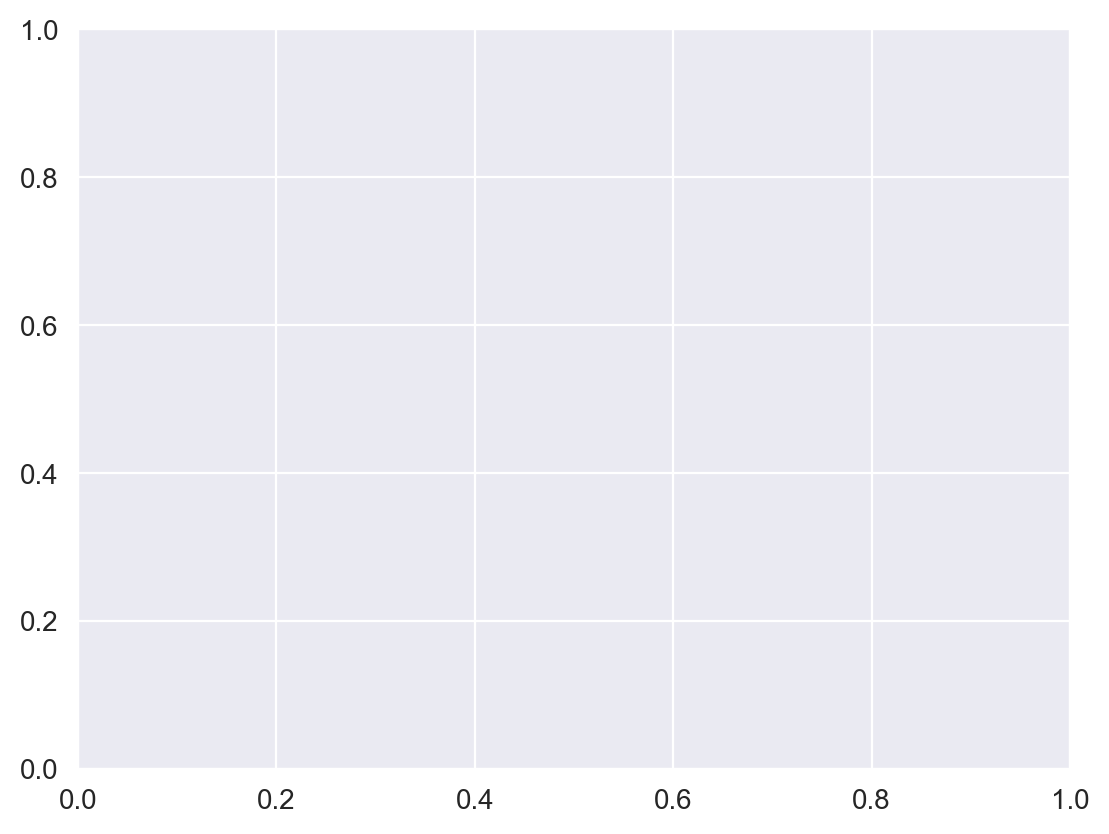

In [23]:
plt.subplots(dpi=200)
sns.lineplot(x='p',y='fraction_captured_total', hue='additional_nodes', data=df, alpha=1, palette='colorblind')
plt.legend(title='Heuristic', labels=['1','2','1+2', '2+1'])
plt.xlabel('Placed stations [#]')
plt.ylabel('Fraction captured total[-]')
plt.show()

In [24]:
df = df.loc[~df.policy.isin([15, 17, 18, 19])]

In [25]:
df.n = df.apply(lambda x: '-' if x.additional_nodes==0 else x.n, axis=1)
df.additional_nodes = df.additional_nodes.apply(lambda x: 'None' if x==0 else x)
df.additional_nodes = df.additional_nodes.apply(lambda x: '2' if x==1 else x)
df.additional_nodes = df.additional_nodes.apply(lambda x: '1' if x==2 else x)
df.additional_nodes = df.additional_nodes.apply(lambda x: '1+2' if x==3 else x)
df.r = df.r.apply(lambda x: x/1000)

In [26]:
df

,r,additional_nodes,n,scenario,policy,model,total_flow,fraction_captured_total,serviceable_fraction,served_fraction,optimal_facilities,non_zero_flows,add_nodes_used
11,50.0,None,-,35,16,frlm,2.941841e+06,0.004238,0.081129,0.052242,"{'22637863': 0.0, '22638019': 0.0, '22638146':...","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",0.0
12,60.0,None,-,36,16,frlm,2.941841e+06,0.004238,0.091274,0.046436,"{'22637863': 0.0, '22638019': 0.0, '22638146':...","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",0.0
13,70.0,None,-,37,16,frlm,2.941841e+06,0.016316,0.103069,0.158305,"{'22637863': 0.0, '22638019': 0.0, '22638146':...","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",0.0
14,80.0,None,-,38,16,frlm,2.941841e+06,0.016316,0.219942,0.074185,"{'22637863': 0.0, '22638019': 0.0, '22638146':...","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",0.0
15,90.0,None,-,39,16,frlm,2.941841e+06,0.016316,0.240058,0.067968,"{'22637863': 0.0, '22638019': 0.0, '22638146':...","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,110.0,1+2,30,41,34,frlm,2.941841e+06,0.016316,0.899031,0.018149,"{'102': 0.0, '103': 0.0, '104': 0.0, '105': 0....","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",0.0
216,120.0,1+2,30,42,34,frlm,2.941841e+06,0.016316,0.967604,0.016863,"{'102': 0.0, '103': 0.0, '104': 0.0, '105': 0....","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",0.0
217,130.0,1+2,30,43,34,frlm,2.941841e+06,0.016316,0.973220,0.016765,"{'102': 0.0, '103': 0.0, '104': 0.0, '105': 0....","{('NLLEY', 'NLAMS', 0): {'combinations': [['88...",1.0
218,140.0,1+2,30,44,34,frlm,2.941841e+06,0.016316,0.991757,0.016452,"{'102': 0.0, '103': 0.0, '104': 0.0, '105': 0....","{('NLLEY', 'NLAMS', 0): {'combinations': [['88...",1.0


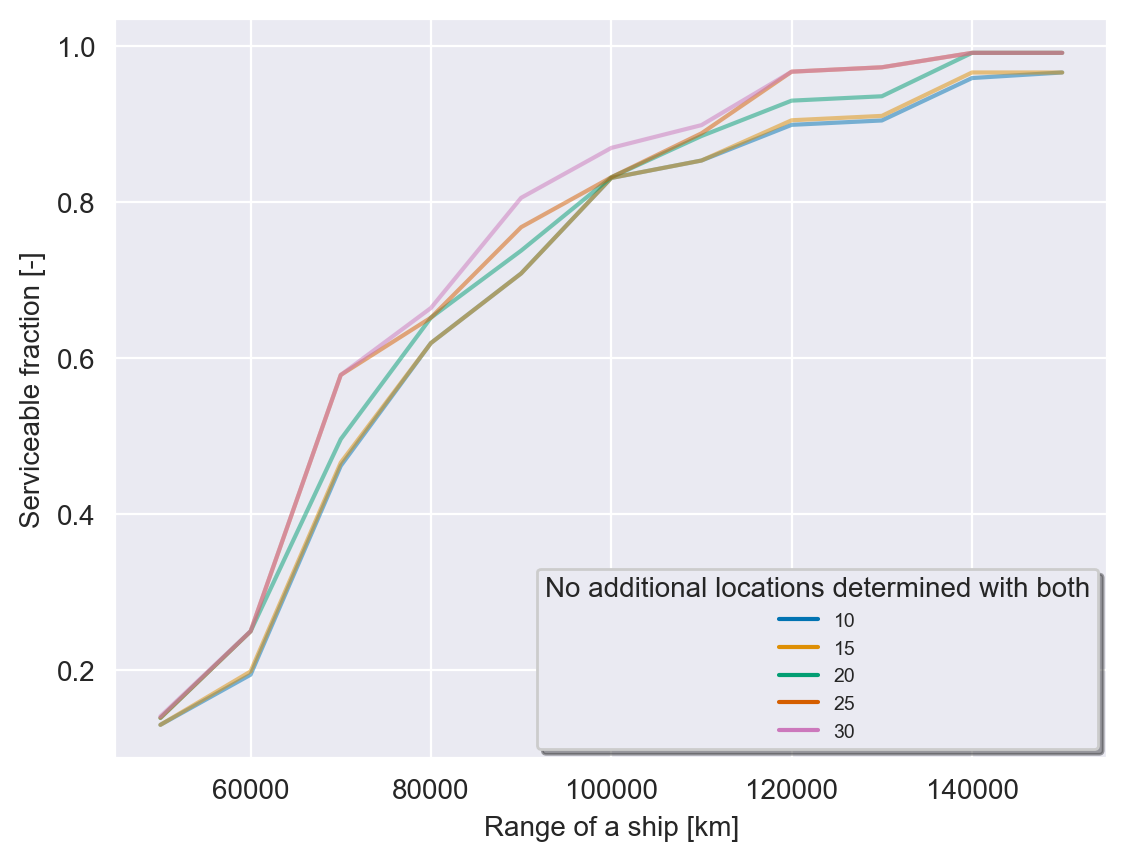

In [13]:
fig, ax = plt.subplots(dpi=200)

sns.lineplot(x='r', y='serviceable_fraction', hue='n', data=df, ax=ax, alpha=0.5, palette='colorblind')
ax.legend(title='No additional locations determined with both', fontsize=7, fancybox=True, shadow=True)
plt.ylabel('Serviceable fraction [-]')
plt.xlabel('Range of a ship [km]')
plt.show()

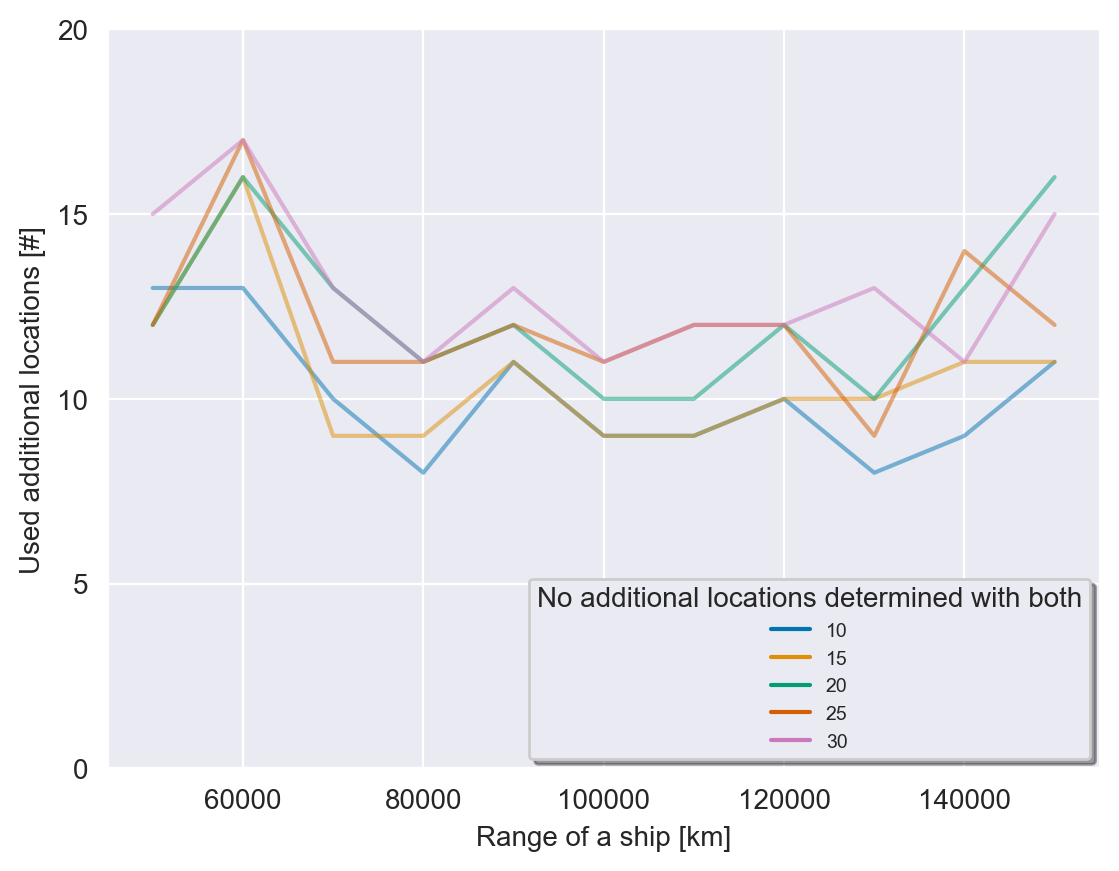

In [15]:
fig, ax = plt.subplots(dpi=200)

sns.lineplot(x='r', y='add_nodes_used', hue='n', data=df, ax=ax, alpha=0.5, palette='colorblind')
# ax.legend(loc='lower right', title="(Heuristic, additional_nodes)", fontsize=7)
plt.yticks([0, 5, 10, 15, 20])
ax.legend(title='No additional locations determined with both', loc= 'lower right', fontsize=7, fancybox=True, shadow=True)
plt.ylabel('Used additional locations [#]')
plt.xlabel("Range of a ship [km]")
plt.show()

In [9]:

sns.scatterplot(x='r', y='serviceable_fraction', hue='policy', data=df.loc[((df.additional_nodes==0)&(df.n==5))|(df.n==10)], ax=ax[0,0])
ax[0,0].legend(title="Heuristic", labels=["None", "1", "2", "1+2"], fontsize=7)
# plt.title("Serviceable fraction considering various ranges")
# plt.ylabel("Serviceable fraction")

sns.scatterplot(x='r', y='serviceable_fraction', hue='policy', data=df.loc[((df.additional_nodes==0)&(df.n==5))|(df.n==15)], ax=ax[0,1])
# ax[0,1].legend(title="Heuristic", labels=["None", "1", "2", "1+2"], fontsize=7)
# plt.title("Serviceable fraction considering various ranges")
# plt.ylabel("Serviceable fraction")

sns.scatterplot(x='r', y='serviceable_fraction', hue='policy', data=df.loc[((df.additional_nodes==0)&(df.n==5))|(df.n==20)], ax=ax[1,0])
# ax[1,0].legend(title="Heuristic", labels=["None", "1", "2", "1+2"], fontsize=7)
# plt.title("Serviceable fraction considering various ranges")
# plt.ylabel("Serviceable fraction")

sns.scatterplot(x='r', y='serviceable_fraction', hue='policy', data=df.loc[((df.additional_nodes==0)&(df.n==5))|(df.n==25)], ax=ax[1,1])
# ax[1,1].legend(title="Heuristic", labels=["None", "1", "2", "1+2"], fontsize=7)
# plt.title("Serviceable fraction considering various ranges")
# plt.ylabel("Serviceable fraction")

# sns.scatterplot(x='r', y='serviceable_fraction', hue='policy', data=df.loc[((df.additional_nodes==0)&(df.n==5))|(df.n==25)], ax=ax[2,0])
# ax[2,0].legend(title="Heuristic", labels=["None", "1", "2", "1+2"], fontsize=7)
# # plt.title("Serviceable fraction considering various ranges")
# # plt.ylabel("Serviceable fraction")


# plt.title("Serviceable fraction considering various ranges")
# plt.ylabel("Serviceable fraction")
# plt.xlabel("Vessel range")
# plt.legend(title="Heuristic", labels=["None", "1", "2", "1+2"])
# plt.legend(title="Heuristic", labels=["None", "None"])
plt.show()

TypeError: 'AxesSubplot' object is not subscriptable

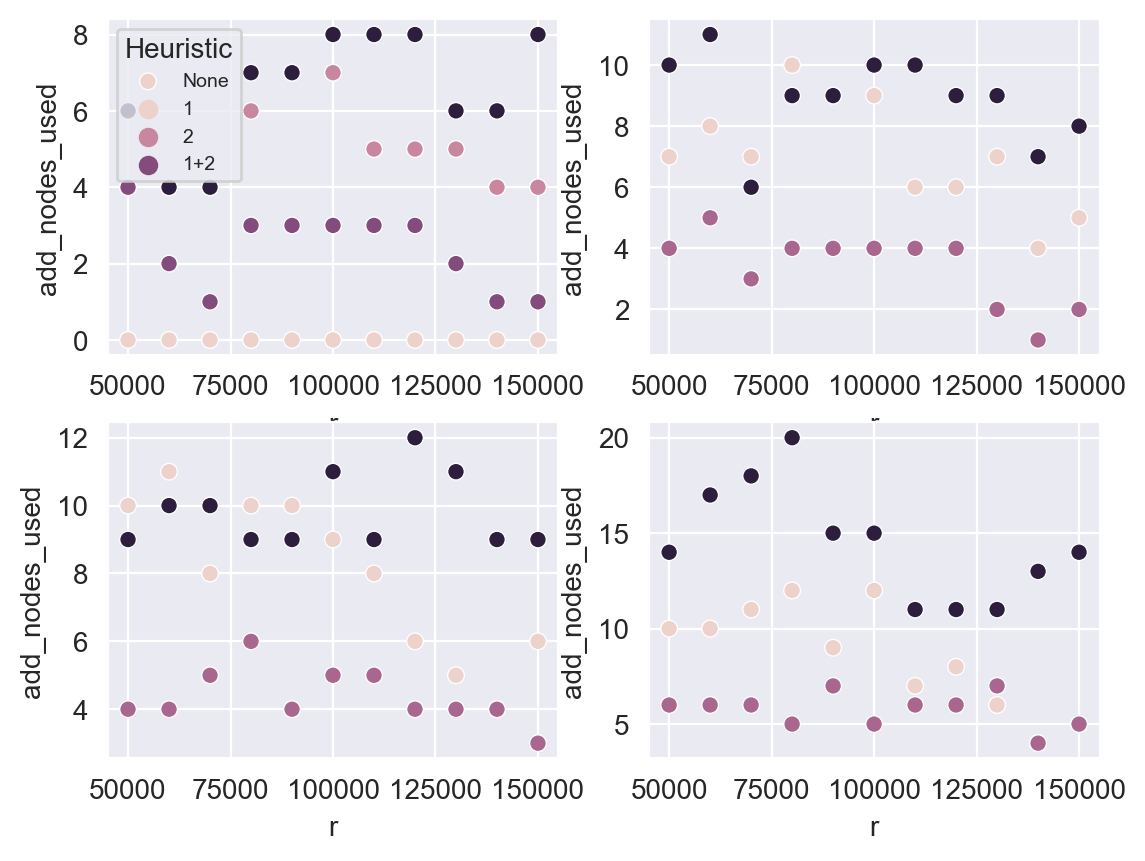

In [10]:
fig, ax = plt.subplots(2, 2, dpi=200)

sns.scatterplot(x='r', y='add_nodes_used', hue='policy', data=df.loc[((df.additional_nodes==0)&(df.n==5))|(df.n==10)], ax=ax[0,0])
ax[0,0].legend(title="Heuristic", labels=["None", "1", "2", "1+2"], fontsize=7)
# plt.title("Serviceable fraction considering various ranges")
# plt.ylabel("Serviceable fraction")

sns.scatterplot(x='r', y='add_nodes_used', hue='policy', data=df.loc[((df.additional_nodes==0)&(df.n==5))|(df.n==15)], ax=ax[0,1])
ax[0,1].legend([],[], frameon=False)
# plt.title("Serviceable fraction considering various ranges")
# plt.ylabel("Serviceable fraction")

sns.scatterplot(x='r', y='add_nodes_used', hue='policy', data=df.loc[((df.additional_nodes==0)&(df.n==5))|(df.n==20)], ax=ax[1,0])
ax[1,0].legend([],[], frameon=False)
# plt.title("Serviceable fraction considering various ranges")
# plt.ylabel("Serviceable fraction")

sns.scatterplot(x='r', y='add_nodes_used', hue='policy', data=df.loc[((df.additional_nodes==0)&(df.n==5))|(df.n==25)], ax=ax[1,1])
ax[1,1].legend([],[], frameon=False)
# plt.title("Serviceable fraction considering various ranges")
# plt.ylabel("Serviceable fraction")


# plt.title("Serviceable fraction considering various ranges")
# plt.ylabel("Serviceable fraction")
# plt.xlabel("Vessel range")
# plt.legend(title="Heuristic", labels=["None", "1", "2", "1+2"])
# plt.legend(title="Heuristic", labels=["None", "None"])
plt.show()

# Performance heuristics n=25

In [21]:
experiments = pickle.load(open("results/experiments_batch_run_n_25.p", "rb"))
outcomes = pickle.load(open("results/outcomes_batch_run_n_25.p", "rb"))

In [22]:
df = pd.merge(experiments,pd.DataFrame(outcomes), left_index=True, right_index=True)

In [23]:
df.additional_nodes = df.additional_nodes.apply(lambda x: 'None' if x==0 else x)
df.additional_nodes = df.additional_nodes.apply(lambda x: '2' if x==1 else x)
df.additional_nodes = df.additional_nodes.apply(lambda x: '1' if x==2 else x)
df.additional_nodes = df.additional_nodes.apply(lambda x: '1+2' if x==3 else x)
df.r = df.r.apply(lambda x: x/1000)

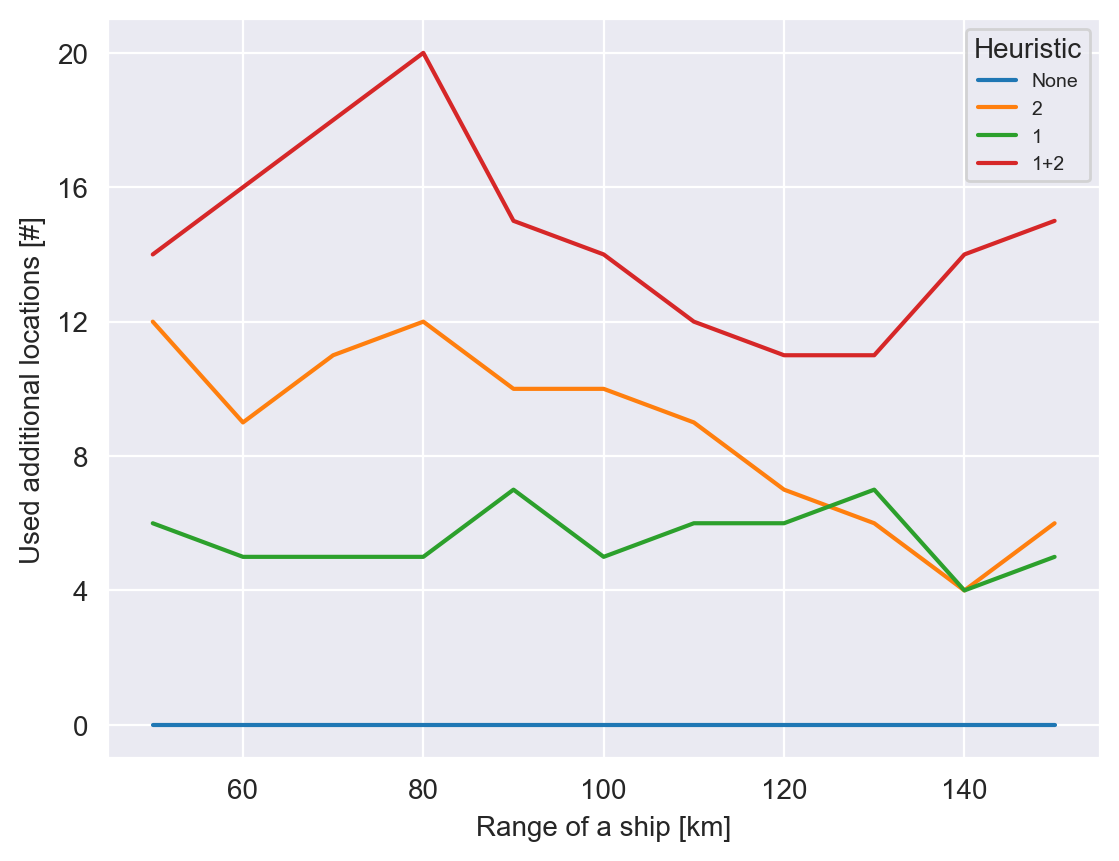

In [24]:
fig, ax = plt.subplots(dpi=200)
sns.lineplot(x='r', y='add_nodes_used', hue='additional_nodes', data=df, ax=ax)
# plt.title("Extra nodes used considering various ranges")
plt.ylabel("Used additional locations [#]")
plt.yticks(np.arange(0, 21, 4))
plt.xlabel("Range of a ship [km]")
plt.legend(title="Heuristic", fontsize=7)
plt.show()

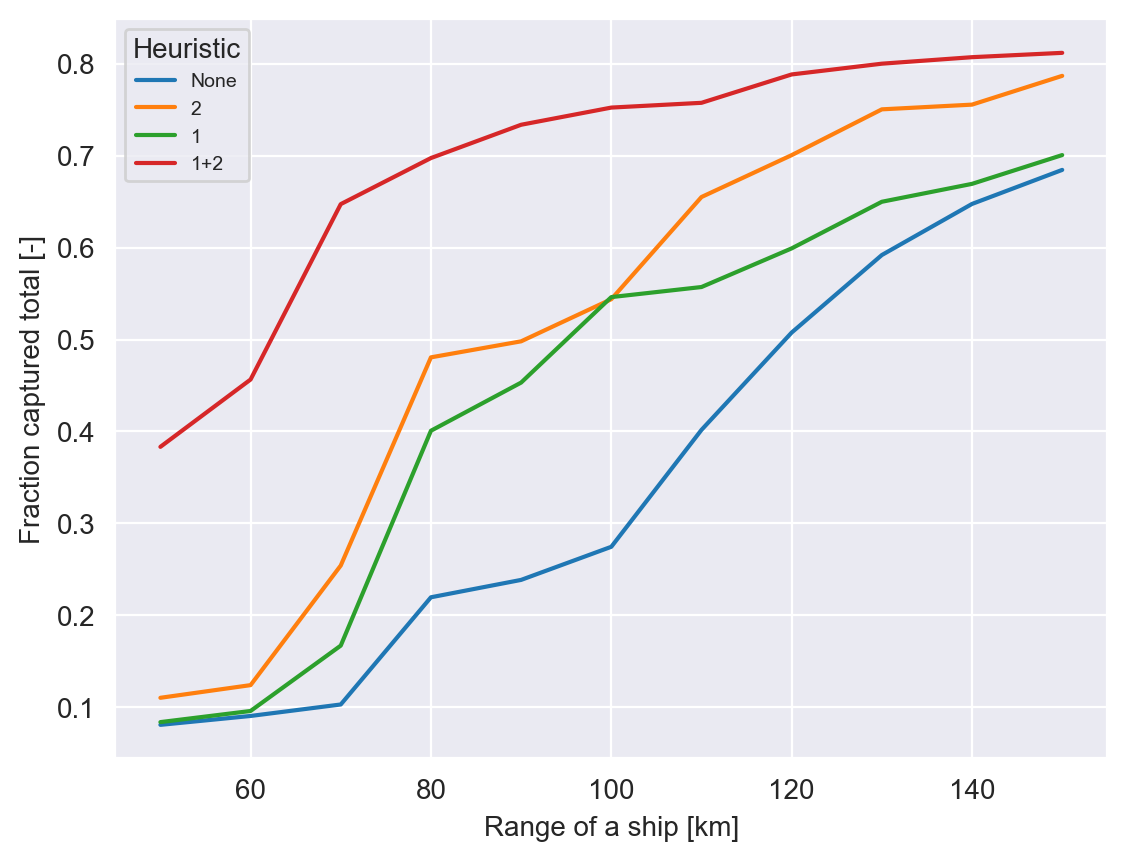

In [25]:
plt.subplots(dpi=200)
sns.lineplot(x='r', y='fraction_captured_total', hue='additional_nodes', data=df)
plt.legend(title="Heuristic", fontsize=7)
plt.ylabel('Fraction captured total [-]')
plt.xlabel('Range of a ship [km]')
plt.show()
# plt.title('Fraction captured total considering various ranges')

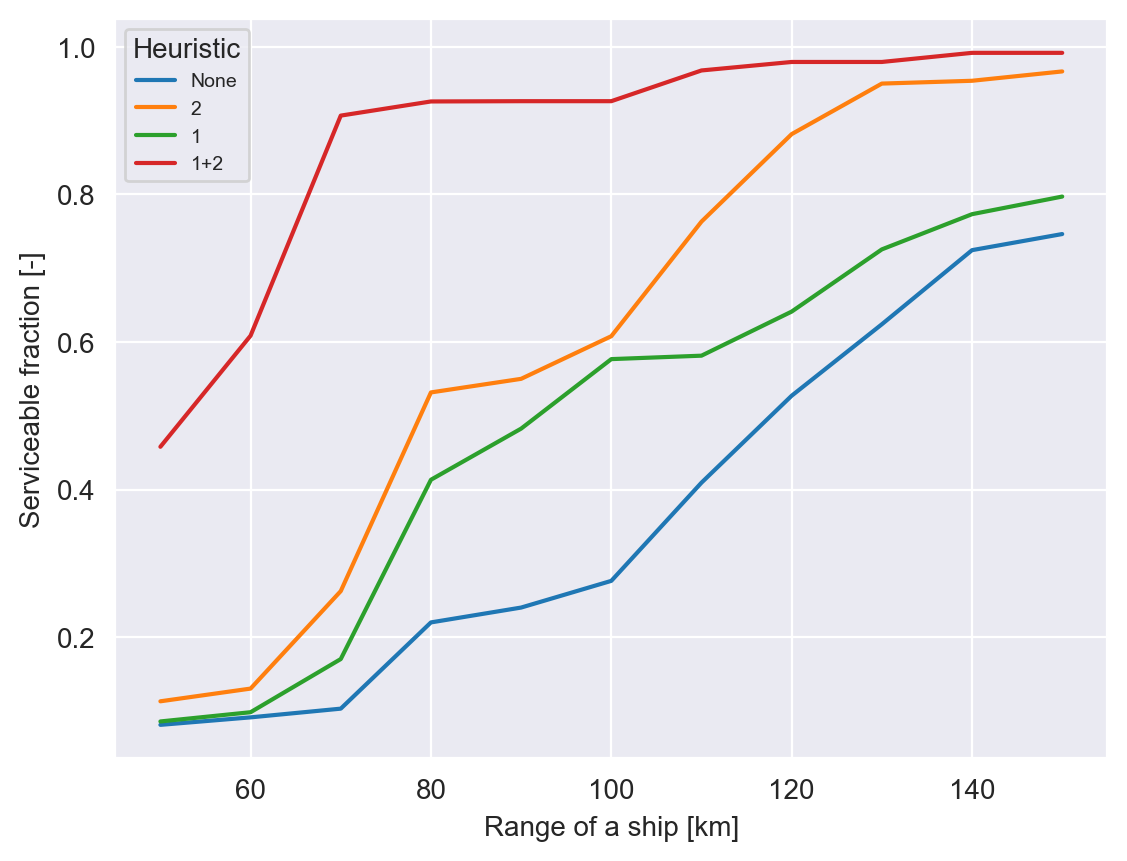

In [26]:
fig, ax =  plt.subplots(dpi=200)
sns.lineplot(x='r', y='serviceable_fraction', hue='additional_nodes', data=df, ax=ax)
plt.legend(title="Heuristic", fontsize=7)
plt.ylabel('Serviceable fraction [-]')
plt.xlabel('Range of a ship [km]')
plt.show()